Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1992: 49.37%
Actual mean Democratic votes for 1992: 42.25%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1996: 45.05%
Actual mean Democratic votes for 1996: 47.65%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2000: 45.87%
Actual mean Democratic votes for 2000: 46.02%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2004: 46.71%
Actual mean Democratic votes for 2004: 46.55%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2008: 46.63%
Actual mean Democratic votes for 2008: 51.36%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2012: 47.39%
Actual mean Democratic votes for 2012: 49.04%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2016: 51.16%
Actual mean Democ

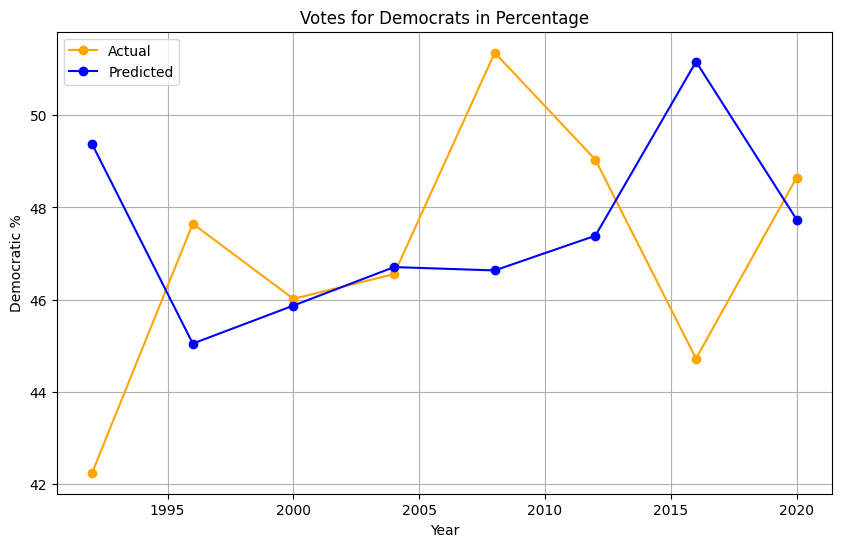

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    # Prepare data for training
    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    
    # Prepare data for testing
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    
    # Ensure the columns match between training and testing sets
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate mean predicted and actual votes for the testing year
    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()


Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1992: 38.50%
Actual mean Democratic votes for 1992: 42.25%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 1996: 46.08%
Actual mean Democratic votes for 1996: 47.65%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2000: 43.36%
Actual mean Democratic votes for 2000: 46.02%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2004: 41.76%
Actual mean Democratic votes for 2004: 46.55%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2008: 49.34%
Actual mean Democratic votes for 2008: 51.36%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2012: 49.88%
Actual mean Democratic votes for 2012: 49.04%
Training dataset: 357 rows
Testing dataset: 51 rows
Predicted mean Democratic votes for 2016: 54.21%
Actual mean Democ

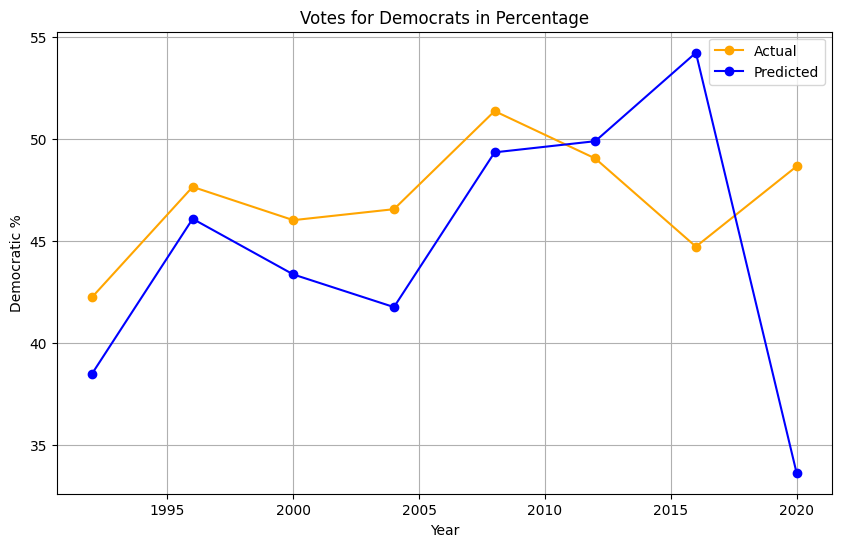

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year using polynomial regression
def train_and_predict_polynomial(year, degree=2):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    # Prepare data for training
    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    
    # Prepare data for testing
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    
    # Ensure the columns match between training and testing sets
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train_poly, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_poly)
    
    # Calculate mean predicted and actual votes for the testing year
    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict_polynomial(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

Linear Regression: MAE = 0.0906
Polynomial Regression (2nd degree): MAE = 1553.2045
Ridge Regression: MAE = 0.0827
Lasso Regression: MAE = 0.0827
Random Forest Regression: MAE = 0.0525
Gradient Boosting Regression: MAE = 0.0518
Predicted Democratic % for Alabama in 2024: 0.3656


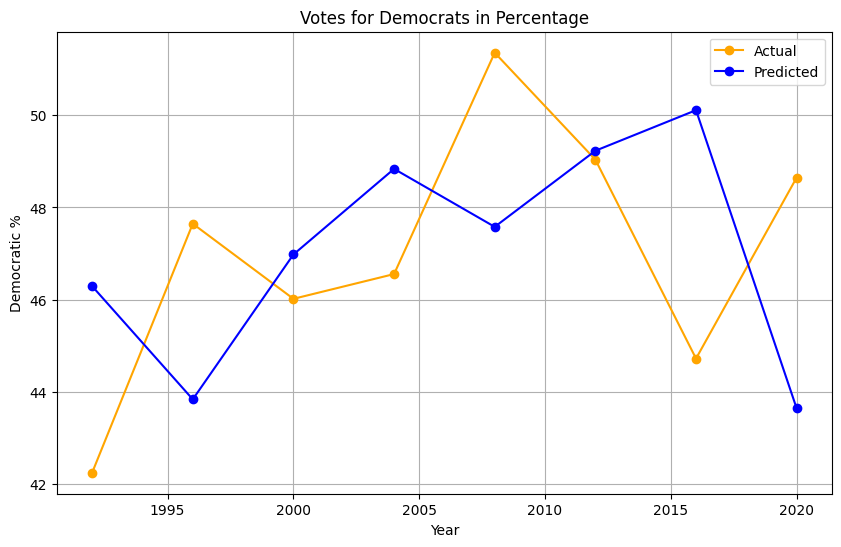

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Convert 'Year' to integer type
data['Year'] = data['Year'].astype(int)

# Prepare the data
X = pd.get_dummies(data[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
y = data['Democratic %']

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (2nd degree)": make_pipeline(PolynomialFeatures(degree=4), LinearRegression()),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    return -scores.mean()

# Evaluate each model
model_performance = {name: evaluate_model(model, X, y) for name, model in models.items()}

# Print model performance
for model_name, performance in model_performance.items():
    print(f"{model_name}: MAE = {performance:.4f}")

# Select the best model
best_model_name = min(model_performance, key=model_performance.get)
best_model = models[best_model_name]

# Train the best model on the entire dataset
best_model.fit(X, y)

# Predict for a specific year (e.g., 2024)
def predict_democratic_percentage(year, state, gun_ownership, hdi, unemployment):
    state_columns = X.columns[X.columns.str.startswith('State_')]
    state_data = {col: 0 for col in state_columns}
    if f'State_{state}' in state_data:
        state_data[f'State_{state}'] = 1
    
    input_data = {'Year': year, 'Gun ownership %': gun_ownership, 'HDI': hdi, 'Unemployment %': unemployment}
    input_data.update(state_data)
    
    input_df = pd.DataFrame([input_data])
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    
    return best_model.predict(input_df)[0]

# Example prediction
example_prediction = predict_democratic_percentage(2024, 'Alabama', 0.55, 0.87, 0.06)
print(f'Predicted Democratic % for Alabama in 2024: {example_prediction:.4f}')

# Plotting the performance of the best model over the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    X_train = pd.get_dummies(df_training[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    y_train = df_training['Democratic %']
    X_test = pd.get_dummies(df_testing[['Year', 'State', 'Gun ownership %', 'HDI', 'Unemployment %']], drop_first=True)
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    mean_predicted_votes = y_pred.mean() * 100
    mean_actual_votes = df_testing['Democratic %'].mean() * 100

    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
21:11:24 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\linear_regression.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression.exe
21:12:05 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression.exe
21:12:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:


21:12:08 - cmdstanpy - INFO - CmdStan done processing.
21:12:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



                  Mean      MCSE     StdDev          5%         50%  \
lp__       -1161.39000  0.037045   1.372820 -1164.10000 -1161.07000   
alpha         37.99180  0.033641   1.458120    35.54770    37.97980   
beta_HDI      14.73610  0.050710   2.243200    11.03110    14.74870   
beta_G         5.23968  0.079759   4.316920    -2.04041     5.20077   
sigma         10.14290  0.006003   0.338781     9.59052    10.13620   
...                ...       ...        ...         ...         ...   
y_rep[404]    48.76590  0.162451  10.232700    32.38170    48.75810   
y_rep[405]    50.15900  0.160356  10.013800    33.64530    50.18210   
y_rep[406]    50.67150  0.166591  10.305500    33.29380    50.64880   
y_rep[407]    51.15490  0.163140  10.221800    34.33850    51.34220   
y_rep[408]    50.46550  0.157163  10.078300    33.75150    50.57140   

                  95%    N_Eff  N_Eff/s     R_hat  
lp__       -1159.7700  1373.28  227.440  1.000860  
alpha         40.4151  1878.62  311.133  1

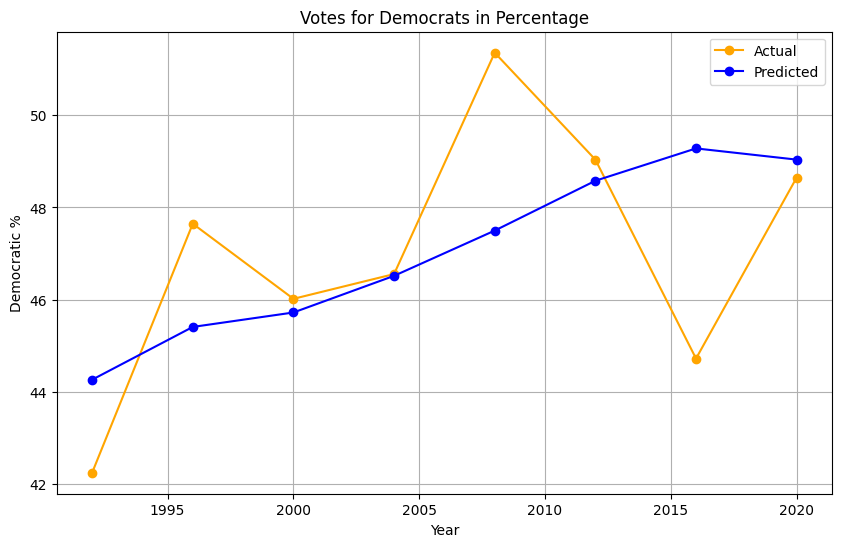

In [1]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI_scaled.flatten(),
    'G': Gun_ownership_scaled.flatten(),
    'V': Democratic_percentage
}

# Compile the Stan model
stan_file = 'linear_regression.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract predictions
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() * 100  # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

21:14:36 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\linear_prior.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_prior.exe
21:15:13 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_prior.exe
21:15:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


21:15:15 - cmdstanpy - INFO - CmdStan done processing.


21:15:15 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 991 divergent transitions (99.1%)
	Chain 2 had 992 divergent transitions (99.2%)
	Chain 3 had 990 divergent transitions (99.0%)
	Chain 4 had 992 divergent transitions (99.2%)
	Use the "diagnose()" method on the CmdStanMCMC object to see further information.
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\matplotlib\axes\_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\szczy\AppData\Roaming\Python\Python312\site-packages\matplotlib\axes\_axes

ValueError: autodetected range of [nan, nan] is not finite

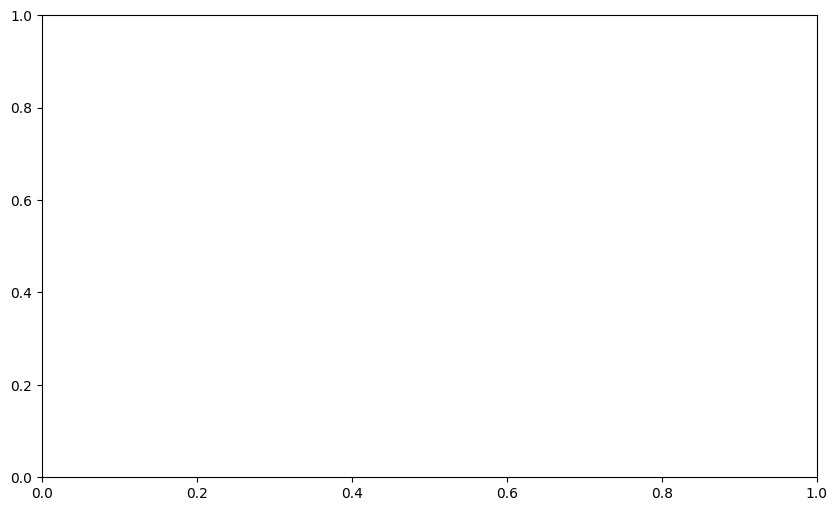

In [2]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI_scaled.flatten(),
    'G': Gun_ownership_scaled.flatten()
}

# Compile the Stan model
stan_file = 'linear_prior.stan'  # Updated model file name
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Extract prior predictive checks
y_prior = fit.stan_variable('y_prior').mean(axis=0)

# Plot prior predictive distribution
plt.figure(figsize=(10, 6))
plt.hist(y_prior, bins=30, alpha=0.7, label='Prior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Prior Predictive Checks')
plt.legend()
plt.show()

20:29:36 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)

chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chai


20:29:40 - cmdstanpy - INFO - CmdStan done processing.
20:29:40 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



                  Mean      MCSE    StdDev          5%         50%  \
lp__        827.844000  0.039520  1.579110  824.852000  828.173000   
alpha        -0.099324  0.000564  0.024793   -0.141211   -0.098992   
beta_HDI      0.852613  0.000538  0.024217    0.814249    0.852591   
beta_G       -0.484640  0.000430  0.023669   -0.523963   -0.484482   
beta_U        0.063301  0.000301  0.017790    0.033583    0.063469   
...                ...       ...       ...         ...         ...   
y_rep[404]    0.386413  0.001160  0.071796    0.269557    0.385260   
y_rep[405]    0.383886  0.001190  0.074669    0.261824    0.382972   
y_rep[406]    0.411068  0.001154  0.073798    0.287495    0.412788   
y_rep[407]    0.408081  0.001185  0.073169    0.287421    0.407715   
y_rep[408]    0.378153  0.001169  0.073334    0.256538    0.378601   

                   95%    N_Eff  N_Eff/s     R_hat  
lp__        829.792000  1596.58  144.553  1.002410  
alpha        -0.058957  1934.49  175.146  1.000070  

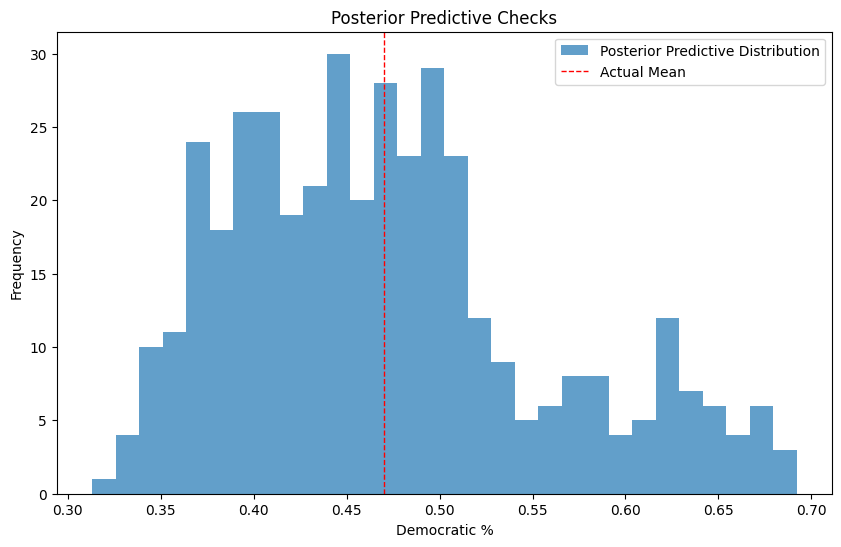

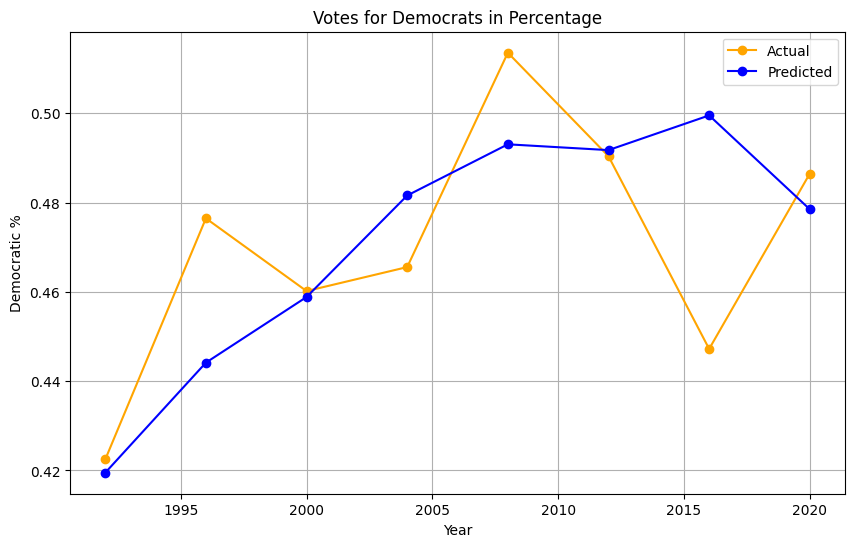

In [11]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values
Gun_ownership = data['Gun ownership %'].values
Unemployment = data['Unemployment %'].values
Democratic_percentage = data['Democratic %'].values # Scaling to percentage

# # Normalize the predictors to [0, 1] range
# scaler = MinMaxScaler()
# HDI_scaled = scaler.fit_transform(HDI)
# Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)
# Unemployment_scaled = scaler.fit_transform(Unemployment)

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'HDI': HDI,
    'G': Gun_ownership,
    'U': Unemployment,
    'V': Democratic_percentage
}

# Compile the Stan model
stan_file = 'linear_regression.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract posterior predictive checks
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plot posterior predictive checks
plt.figure(figsize=(10, 6))
plt.hist(y_rep, bins=30, alpha=0.7, label='Posterior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Checks')
plt.legend()
plt.show()

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## 2 predictors

Training dataset: 357 rows
Testing dataset: 51 rows


21:00:57 - cmdstanpy - INFO - compiling stan file C:\Users\szczy\Desktop\STUDIA\MAGIST~1\DATA_A~1\Project\PREDIC~1\linear_regression2.stan to exe file C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression2.exe
21:01:40 - cmdstanpy - INFO - compiled model executable: C:\Users\szczy\Desktop\STUDIA\Magisterka sem1\Data_Analytics\Project\Predicting-USA-presidential-elections\linear_regression2.exe
21:01:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)



chain 1 |██████▎   | 00


21:01:44 - cmdstanpy - INFO - CmdStan done processing.
21:01:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1992: 0.42%
Actual mean Democratic votes for 1992: 0.42%
Training dataset: 357 rows
Testing dataset: 51 rows


21:01:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)



21:01:49 - cmdstanpy - INFO - CmdStan done processing.
21:01:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1996: 0.44%
Actual mean Democratic votes for 1996: 0.48%
Training dataset: 357 rows
Testing dataset: 51 rows


21:01:51 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sam


21:01:54 - cmdstanpy - INFO - CmdStan done processing.
21:01:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2000: 0.46%
Actual mean Democratic votes for 2000: 0.46%
Training dataset: 357 rows
Testing dataset: 51 rows


21:01:56 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling


21:01:59 - cmdstanpy - INFO - CmdStan done processing.
21:01:59 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2004: 0.48%
Actual mean Democratic votes for 2004: 0.47%
Training dataset: 357 rows
Testing dataset: 51 rows


21:02:00 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling


21:02:03 - cmdstanpy - INFO - CmdStan done processing.
21:02:03 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2008: 0.49%
Actual mean Democratic votes for 2008: 0.51%
Training dataset: 357 rows
Testing dataset: 51 rows


21:02:05 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)

chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)




21:02:08 - cmdstanpy - INFO - CmdStan done processing.
21:02:08 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2012: 0.49%
Actual mean Democratic votes for 2012: 0.49%
Training dataset: 357 rows
Testing dataset: 51 rows


21:02:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)




chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)




chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (S


21:02:12 - cmdstanpy - INFO - CmdStan done processing.
21:02:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2016: 0.51%
Actual mean Democratic votes for 2016: 0.45%
Training dataset: 357 rows
Testing dataset: 51 rows


21:02:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)
chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


21:02:17 - cmdstanpy - INFO - CmdStan done processing.
21:02:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2020: 0.48%
Actual mean Democratic votes for 2020: 0.49%


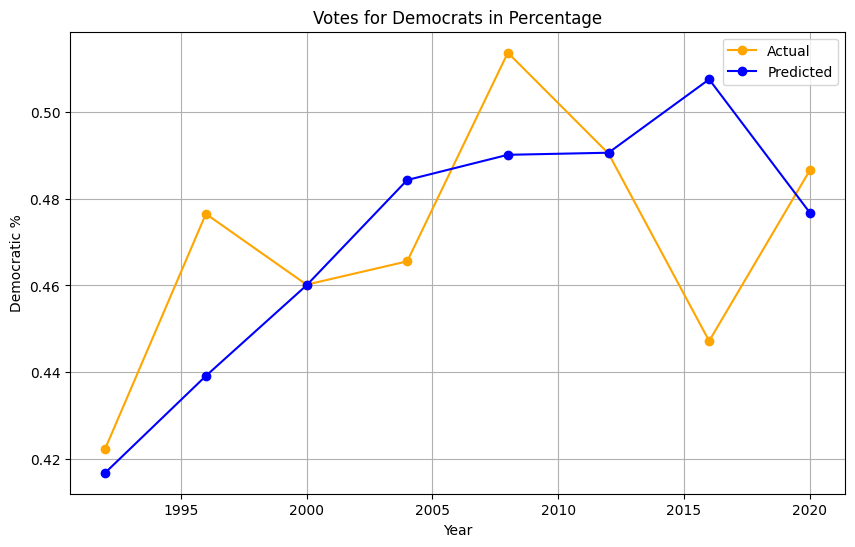

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression2.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## 3 predictors

Training dataset: 357 rows
Testing dataset: 51 rows


20:39:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)
chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 


20:40:01 - cmdstanpy - INFO - CmdStan done processing.
20:40:01 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1992: 0.42%
Actual mean Democratic votes for 1992: 0.42%
Training dataset: 357 rows
Testing dataset: 51 rows


20:40:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)





20:40:06 - cmdstanpy - INFO - CmdStan done processing.
20:40:06 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1996: 0.44%
Actual mean Democratic votes for 1996: 0.48%
Training dataset: 357 rows
Testing dataset: 51 rows


20:40:08 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)




chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)




20:40:11 - cmdstanpy - INFO - CmdStan done processing.
20:40:11 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2000: 0.46%
Actual mean Democratic votes for 2000: 0.46%
Training dataset: 357 rows
Testing dataset: 51 rows


20:40:12 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


cha


20:40:17 - cmdstanpy - INFO - CmdStan done processing.


20:40:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!


Predicted mean Democratic votes for 2004: 0.48%
Actual mean Democratic votes for 2004: 0.47%
Training dataset: 357 rows
Testing dataset: 51 rows


20:40:18 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


ch


20:40:22 - cmdstanpy - INFO - CmdStan done processing.
20:40:23 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2008: 0.49%
Actual mean Democratic votes for 2008: 0.51%
Training dataset: 357 rows
Testing dataset: 51 rows


20:40:24 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)




chai


20:40:27 - cmdstanpy - INFO - CmdStan done processing.
20:40:28 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2012: 0.49%
Actual mean Democratic votes for 2012: 0.49%
Training dataset: 357 rows
Testing dataset: 51 rows


20:40:29 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)

chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


ch


20:40:32 - cmdstanpy - INFO - CmdStan done processing.
20:40:32 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2016: 0.51%
Actual mean Democratic votes for 2016: 0.45%
Training dataset: 357 rows
Testing dataset: 51 rows


20:40:34 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)




chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)





20:40:37 - cmdstanpy - INFO - CmdStan done processing.
20:40:37 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2020: 0.48%
Actual mean Democratic votes for 2020: 0.49%


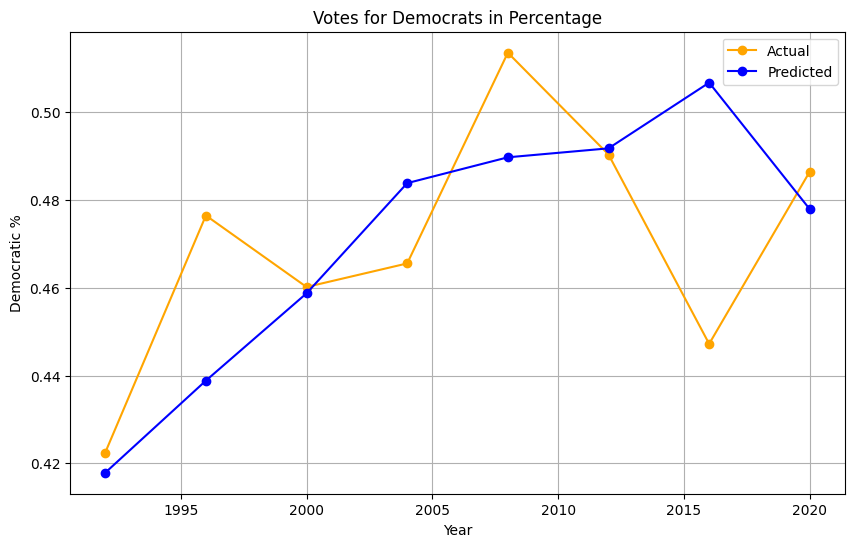

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

data['Year'] = data['Year'].astype(int)

# Function to train the model and predict for a specific year
def train_and_predict(year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %'] + beta_U_train * df_testing['Unemployment %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]
all_predicted_votes = []
all_actual_votes = []

for year in years:
    predicted, actual = train_and_predict(year)
    all_predicted_votes.append(predicted)
    all_actual_votes.append(actual)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

## Posterior dla linear_regression

In [16]:
# Prepare data for posterior predictive check
stan_data_posterior = {
    'N': len(data),
    'HDI': data['HDI'].values,
    'G': data['Gun ownership %'].values,
    'U': data['Unemployment %'].values,
    'V': data['Democratic %'].values
}

# Compile and run the posterior predictive model
stan_file_posterior = 'linear_regression.stan'
model_posterior = CmdStanModel(stan_file=stan_file_posterior)
fit_posterior = model_posterior.sample(data=stan_data_posterior, chains=4, seed=47, show_console=True)
print(fit_posterior.diagnose())

20:48:53 - cmdstanpy - INFO - Chain [1] start processing
20:48:53 - cmdstanpy - INFO - Chain [2] start processing
20:48:53 - cmdstanpy - INFO - Chain [3] start processing
20:48:53 - cmdstanpy - INFO - Chain [4] start processing


Chain [1] method = sample (Default)
Chain [1] sample
Chain [1] num_samples = 1000 (Default)
Chain [1] num_warmup = 1000 (Default)
Chain [1] save_warmup = 0 (Default)
Chain [1] thin = 1 (Default)
Chain [1] adapt
Chain [1] engaged = 1 (Default)
Chain [1] gamma = 0.05 (Default)
Chain [1] delta = 0.8 (Default)
Chain [1] kappa = 0.75 (Default)
Chain [1] t0 = 10 (Default)
Chain [1] init_buffer = 75 (Default)
Chain [1] term_buffer = 50 (Default)
Chain [1] window = 25 (Default)
Chain [1] save_metric = 0 (Default)
Chain [1] algorithm = hmc (Default)
Chain [1] hmc
Chain [1] engine = nuts (Default)
Chain [1] nuts
Chain [1] max_depth = 10 (Default)
Chain [1] metric = diag_e (Default)
Chain [1] metric_file =  (Default)
Chain [1] stepsize = 1 (Default)
Chain [1] stepsize_jitter = 0 (Default)
Chain [1] num_chains = 1 (Default)
Chain [1] id = 1 (Default)
Chain [1] data
Chain [1] file = C:\Users\szczy\AppData\Local\Temp\tmpjah7siry\2csj08ao.json
Chain [1] init = 2 (Default)
Chain [1] random
Chain [1] s

20:48:58 - cmdstanpy - INFO - Chain [4] done processing
20:48:58 - cmdstanpy - INFO - Chain [3] done processing


Chain [4] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [4] 
Chain [4] Elapsed Time: 1.628 seconds (Warm-up)
Chain [4] 2.862 seconds (Sampling)
Chain [4] 4.49 seconds (Total)
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [4] 
Chain [3] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [3] 
Chain [3] Elapsed Time: 1.653 seconds (Warm-up)
Chain [3] 2.867 seconds (Sampling)
Chain [3] 4.52 seconds (Total)
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3] 
Chain [3

20:48:58 - cmdstanpy - INFO - Chain [2] done processing
20:48:58 - cmdstanpy - INFO - Chain [1] done processing
20:48:58 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)


Chain [2] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [2] 
Chain [2] Elapsed Time: 1.677 seconds (Warm-up)
Chain [2] 3.033 seconds (Sampling)
Chain [2] 4.71 seconds (Total)
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [2] 
Chain [1] Iteration: 2000 / 2000 [100%]  (Sampling)
Chain [1] 
Chain [1] Elapsed Time: 1.568 seconds (Warm-up)
Chain [1] 3.221 seconds (Sampling)
Chain [1] 4.789 seconds (Total)
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [1] 
Chain [

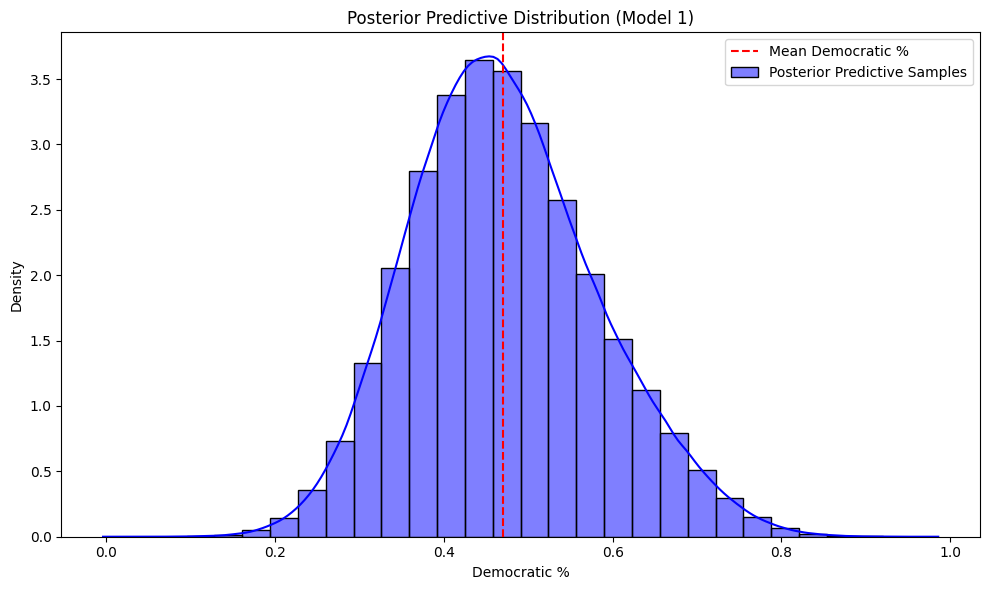

In [18]:
import seaborn as sns
import arviz as az

# Extract posterior predictive samples
y_rep_posterior = fit_posterior.draws_pd()
y_rep_posterior = y_rep_posterior.filter(regex='y_rep')

# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()

# Plot the posterior predictive samples using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution (Model 1)')
plt.tight_layout()
plt.show()

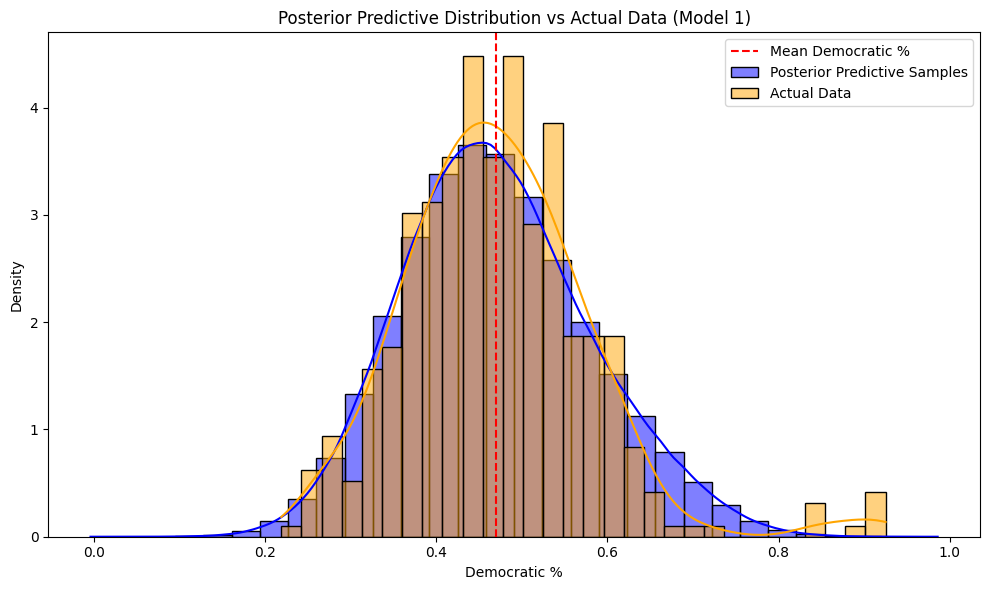

In [21]:
# Flatten the values for plotting
y_rep_posterior_flat = y_rep_posterior.values.flatten()
actual_data_flat = data['Democratic %'].values

# Plot the posterior predictive samples and actual data using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(y_rep_posterior_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Posterior Predictive Samples', color='blue')
sns.histplot(actual_data_flat, bins=30, kde=True, stat="density", alpha=0.5, label='Actual Data', color='orange')

# Add mean line
mean_democratic_pct = data['Democratic %'].mean()
plt.axvline(x=mean_democratic_pct, color='r', linestyle='--', label='Mean Democratic %')

# Customize the plot
plt.xlabel('Democratic %')
plt.ylabel('Density')
plt.legend()
plt.title('Posterior Predictive Distribution vs Actual Data (Model 1)')
plt.tight_layout()
plt.show()

Training dataset: 357 rows
Testing dataset: 51 rows


21:21:37 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)




chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)




21:21:41 - cmdstanpy - INFO - CmdStan done processing.
21:21:41 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1992: 0.42%
Actual mean Democratic votes for 1992: 0.42%
Training dataset: 357 rows
Testing dataset: 51 rows


21:21:43 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


21:21:47 - cmdstanpy - INFO - CmdStan done processing.
21:21:47 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1996: 0.44%
Actual mean Democratic votes for 1996: 0.48%
Training dataset: 357 rows
Testing dataset: 51 rows


21:21:48 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)




21:21:52 - cmdstanpy - INFO - CmdStan done processing.
21:21:52 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2000: 0.46%
Actual mean Democratic votes for 2000: 0.46%
Training dataset: 357 rows
Testing dataset: 51 rows


21:21:53 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)

chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)





21:21:57 - cmdstanpy - INFO - CmdStan done processing.
21:21:57 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2004: 0.48%
Actual mean Democratic votes for 2004: 0.47%
Training dataset: 357 rows
Testing dataset: 51 rows


21:21:58 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1


21:22:02 - cmdstanpy - INFO - CmdStan done processing.
21:22:02 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2008: 0.49%
Actual mean Democratic votes for 2008: 0.51%
Training dataset: 357 rows
Testing dataset: 51 rows


21:22:03 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)
chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)



chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


ch

21:22:07 - cmdstanpy - INFO - CmdStan done processing.
21:22:07 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2012: 0.49%
Actual mean Democratic votes for 2012: 0.49%
Training dataset: 357 rows
Testing dataset: 51 rows


21:22:09 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)




chain 1 |██▋       | 00:01 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:02 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


cha


21:22:13 - cmdstanpy - INFO - CmdStan done processing.
21:22:13 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2016: 0.51%
Actual mean Democratic votes for 2016: 0.45%
Training dataset: 357 rows
Testing dataset: 51 rows


21:22:15 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


ch


21:22:18 - cmdstanpy - INFO - CmdStan done processing.
21:22:18 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression.stan', line 25, column 2 to column 70)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2020: 0.48%
Actual mean Democratic votes for 2020: 0.49%


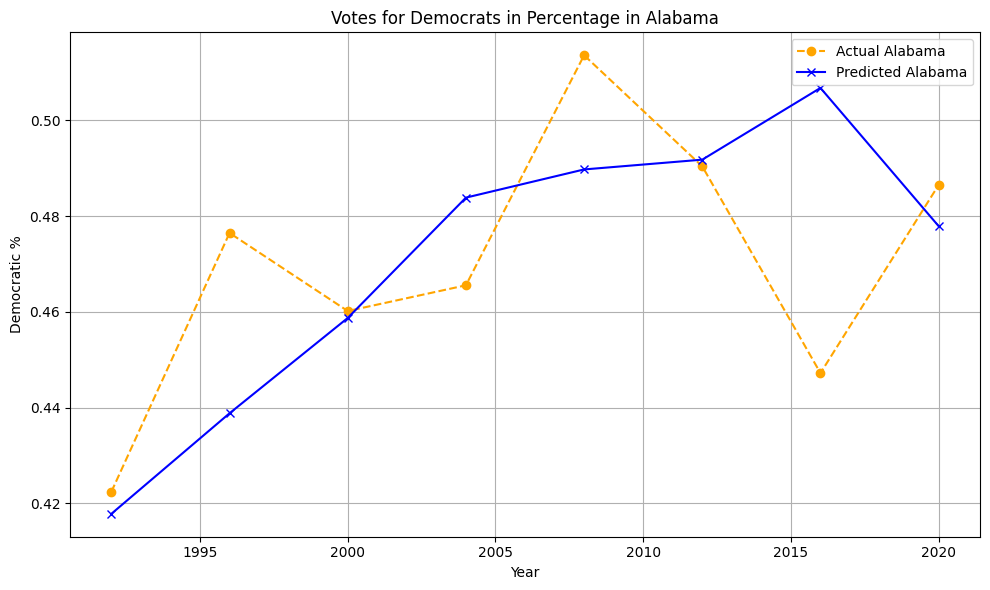

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Assuming 'data' is your DataFrame with the necessary columns
# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for Alabama
def train_and_predict(data, year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'U': df_training['Unemployment %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()
    beta_U_train = fit_train.stan_variable('beta_U').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %'] + beta_U_train * df_testing['Unemployment %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Initialize lists to store actuals and predictions
actuals = []
predictions = []

# Loop through each year and make predictions
for year in years:
    predicted, actual = train_and_predict(data, year)
    predictions.append(predicted)
    actuals.append(actual)

# Plot the results for Alabama
plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label='Actual Alabama', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label='Predicted Alabama', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage in Alabama')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Training dataset: 357 rows
Testing dataset: 51 rows


21:23:22 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)



chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)




chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%


21:23:25 - cmdstanpy - INFO - CmdStan done processing.
21:23:25 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1992: 0.42%
Actual mean Democratic votes for 1992: 0.42%
Training dataset: 357 rows
Testing dataset: 51 rows


21:23:27 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Samp


21:23:30 - cmdstanpy - INFO - CmdStan done processing.
21:23:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 1996: 0.44%
Actual mean Democratic votes for 1996: 0.48%
Training dataset: 357 rows
Testing dataset: 51 rows


21:23:31 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)



chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)




chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)
chain 1 |██████████| 00:02 Sampling completed                 


21:23:34 - cmdstanpy - INFO - CmdStan done processing.
21:23:34 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2000: 0.46%
Actual mean Democratic votes for 2000: 0.46%
Training dataset: 357 rows
Testing dataset: 51 rows


21:23:35 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)
chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▍    | 00:00 Iteration: 1000 / 2000 [ 50%]  (Warmup)

chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)



21:23:38 - cmdstanpy - INFO - CmdStan done processing.
21:23:38 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2004: 0.48%
Actual mean Democratic votes for 2004: 0.47%
Training dataset: 357 rows
Testing dataset: 51 rows


21:23:41 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status








chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)

chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)
chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)
chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


c


21:23:44 - cmdstanpy - INFO - CmdStan done processing.
21:23:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2008: 0.49%
Actual mean Democratic votes for 2008: 0.51%
Training dataset: 357 rows
Testing dataset: 51 rows


21:23:46 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)




chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)
chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)




21:23:50 - cmdstanpy - INFO - CmdStan done processing.
21:23:50 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2012: 0.49%
Actual mean Democratic votes for 2012: 0.49%
Training dataset: 357 rows
Testing dataset: 51 rows


21:23:52 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)



chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████▍    | 00:01 Iteration: 1000 / 2000 [ 50%]  (Warmup)





chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:02 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampl


21:23:55 - cmdstanpy - INFO - CmdStan done processing.
21:23:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2016: 0.51%
Actual mean Democratic votes for 2016: 0.45%
Training dataset: 357 rows
Testing dataset: 51 rows


21:23:57 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)



chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)

chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)
chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)

chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:01 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |███████▋  | 00:02 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chai

21:24:00 - cmdstanpy - INFO - CmdStan done processing.
21:24:00 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'linear_regression2.stan', line 22, column 2 to column 57)
Consider re-running with show_console=True if the above output is unclear!



Predicted mean Democratic votes for 2020: 0.48%
Actual mean Democratic votes for 2020: 0.49%


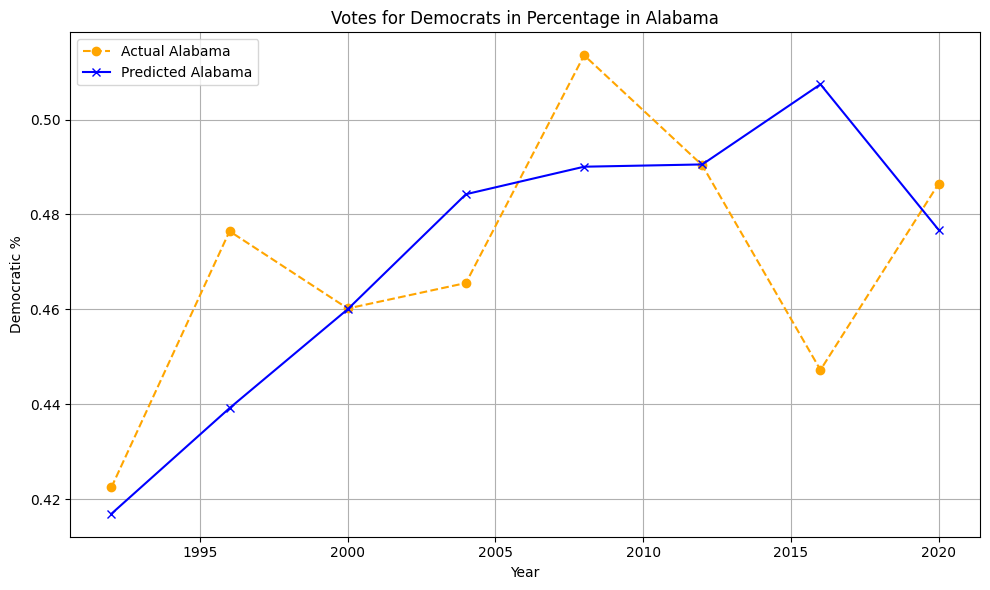

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

# Assuming 'data' is your DataFrame with the necessary columns
# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for Alabama
def train_and_predict(data, year):
    df_training = data[data['Year'] != year]
    df_testing = data[data['Year'] == year]

    print(f"Training dataset: {len(df_training)} rows")
    print(f"Testing dataset: {len(df_testing)} rows")

    stan_data_train = {
        'N': len(df_training),
        'HDI': df_training['HDI'].values,
        'G': df_training['Gun ownership %'].values,
        'V': df_training['Democratic %'].values
    }

    stan_file_train = 'linear_regression2.stan'
    model_train = CmdStanModel(stan_file=stan_file_train)
    fit_train = model_train.sample(data=stan_data_train, chains=4, seed=47)

    alpha_train = fit_train.stan_variable('alpha').mean()
    beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
    beta_G_train = fit_train.stan_variable('beta_G').mean()

    predicted_votes_test = alpha_train + beta_HDI_train * df_testing['HDI'] + beta_G_train * df_testing['Gun ownership %']
    mean_predicted_votes = predicted_votes_test.mean()
    mean_actual_votes = df_testing['Democratic %'].mean()

    print(f"Predicted mean Democratic votes for {year}: {mean_predicted_votes:.2f}%")
    print(f"Actual mean Democratic votes for {year}: {mean_actual_votes:.2f}%")

    return mean_predicted_votes, mean_actual_votes

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Initialize lists to store actuals and predictions
actuals = []
predictions = []

# Loop through each year and make predictions
for year in years:
    predicted, actual = train_and_predict(data, year)
    predictions.append(predicted)
    actuals.append(actual)

# Plot the results for Alabama
plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label='Actual Alabama', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label='Predicted Alabama', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage in Alabama')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Convert Year to int
data['Year'] = data['Year'].astype(int)

# Function to train the model and make predictions for Alabama
def train_and_predict_state(state, years):
    state_data = data[data['State'] == state]
    
    actuals = []
    predictions = []

    for year in years:
        df_training = state_data[state_data['Year'] != year]
        df_testing = state_data[state_data['Year'] == year]

        if df_testing.empty:
            continue
        
        stan_data_train = {
            'N': len(df_training),
            'HDI': df_training['HDI'].values,
            'G': df_training['Gun ownership %'].values,
            'U': df_training['Unemployment %'].values,
            'V': df_training['Democratic %'].values * 100  # type: ignore
        }

        stan_file_train = 'linear_regression.stan'
        model = CmdStanModel(stan_file=stan_file_train)
        fit_train = model.sample(data=stan_data_train, chains=4, seed=53)

        alpha_train = fit_train.stan_variable('alpha').mean()
        beta_HDI_train = fit_train.stan_variable('beta_HDI').mean()
        beta_G_train = fit_train.stan_variable('beta_G').mean()
        beta_U_train = fit_train.stan_variable('beta_U').mean()

        predicted_votes_test = (
            alpha_train + beta_HDI_train * df_testing['HDI'].values + beta_G_train * df_testing['Gun ownership %'].values
            + beta_U_train * df_testing['Unemployment %'].values
        )

        predictions.append(predicted_votes_test.mean())
        actuals.append(df_testing['Democratic %'].mean())
    
    return actuals, predictions

# Define the years
years = [1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]

# Plot the results for Alabama
state = 'Alabama'
actuals, predictions = train_and_predict_state(state, years)

plt.figure(figsize=(10, 6))
plt.plot(years, actuals, label=f'Actual {state}', linestyle='--', marker='o', color='orange')
plt.plot(years, predictions, label=f'Predicted {state}', linestyle='-', marker='x', color='blue')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title(f'Votes for Democrats in Percentage in {state}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)

# Ensure correct data types
data['Year'] = data['Year'].astype(int)

# Extract required columns
HDI = data['HDI'].values.reshape(-1, 1)
Gun_ownership = data['Gun ownership %'].values.reshape(-1, 1)
Unemployment = data['Unemployment %'].values.reshape(-1, 1)
Democratic_percentage = data['Democratic %'].values * 100  # Scaling to percentage

# Normalize the predictors to [0, 1] range
scaler = MinMaxScaler()
HDI_scaled = scaler.fit_transform(HDI)
Gun_ownership_scaled = scaler.fit_transform(Gun_ownership)
Unemployment_scaled = scaler.fit_transform(Unemployment)

# Factorize the state column to get unique state indices
state_codes, state_indices = pd.factorize(data['State'])

# Prepare the data for Stan
stan_data = {
    'N': len(Democratic_percentage),
    'K': 3,  # Number of predictors
    'J': len(state_codes),  # Number of unique states
    'state': state_indices + 1,  # 1-based index for Stan
    'X': np.column_stack((HDI_scaled, Gun_ownership_scaled, Unemployment_scaled)),
    'y': Democratic_percentage
}

# Compile the Stan model
stan_file = 'hierarchical_model.stan'
model = CmdStanModel(stan_file=stan_file)

# Sample from the model
fit = model.sample(data=stan_data, chains=4, seed=42)

# Print summary of the fit
print(fit.summary())

# Extract posterior predictive checks
y_rep = fit.stan_variable('y_rep').mean(axis=0)

# Plot posterior predictive checks
plt.figure(figsize=(10, 6))
plt.hist(y_rep, bins=30, alpha=0.7, label='Posterior Predictive Distribution')
plt.axvline(np.mean(Democratic_percentage), color='r', linestyle='dashed', linewidth=1, label='Actual Mean')
plt.xlabel('Democratic %')
plt.ylabel('Frequency')
plt.title('Posterior Predictive Checks')
plt.legend()
plt.show()

# Plotting the actual vs predicted
years = data['Year'].unique()
all_predicted_votes = []
all_actual_votes = []

for year in years:
    df_testing = data[data['Year'] == year]
    y_pred_year = y_rep[df_testing.index]
    mean_predicted_votes = y_pred_year.mean()
    mean_actual_votes = df_testing['Democratic %'].mean() * 100  # Scaling to percentage
    
    all_predicted_votes.append(mean_predicted_votes)
    all_actual_votes.append(mean_actual_votes)

plt.figure(figsize=(10, 6))
plt.plot(years, all_actual_votes, label='Actual', color='orange', marker='o')
plt.plot(years, all_predicted_votes, label='Predicted', color='blue', marker='o')
plt.xlabel('Year')
plt.ylabel('Democratic %')
plt.title('Votes for Democrats in Percentage')
plt.legend()
plt.grid(True)
plt.show()

TypeError: can only concatenate str (not "int") to str

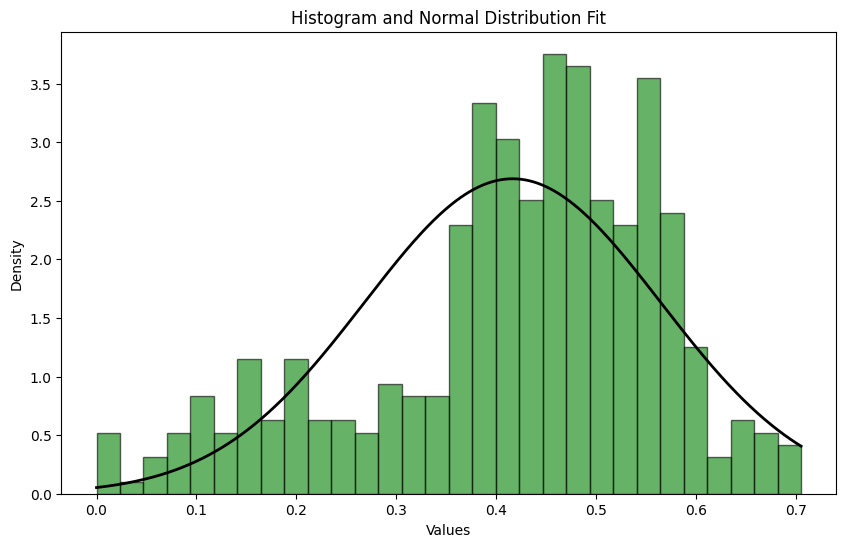

(0.41635294117647065, 0.14843232412210847)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Dane
data_values = [
    0.552, 0.568, 0.538, 0.516, 0.503, 0.543, 0.528, 0.555, 0.685, 0.663, 0.601, 0.58,
    0.613, 0.607, 0.572, 0.645, 0.547, 0.449, 0.427, 0.368, 0.382, 0.415, 0.36, 0.463,
    0.533, 0.58, 0.542, 0.544, 0.508, 0.544, 0.518, 0.572, 0.402, 0.291, 0.274, 0.203,
    0.175, 0.214, 0.163, 0.283, 0.483, 0.465, 0.467, 0.411, 0.402, 0.414, 0.379, 0.451,
    0.375, 0.238, 0.202, 0.166, 0.192, 0.183, 0.188, 0.236, 0.378, 0.392, 0.352, 0.331,
    0.263, 0.308, 0.387, 0.344, 0.0, 0.0, 0.0, 0.0, 0.01, 0.03, 0.05, 0.07, 0.426, 0.364,
    0.32, 0.234, 0.303, 0.309, 0.288, 0.353, 0.569, 0.52, 0.467, 0.43, 0.395, 0.401, 0.377,
    0.492, 0.192, 0.146, 0.124, 0.2, 0.099, 0.12, 0.091, 0.149, 0.666, 0.601, 0.609, 0.557,
    0.543, 0.552, 0.578, 0.601, 0.324, 0.288, 0.286, 0.226, 0.205, 0.266, 0.226, 0.278,
    0.505, 0.479, 0.444, 0.391, 0.374, 0.432, 0.424, 0.448, 0.463, 0.451, 0.477, 0.423,
    0.396, 0.409, 0.385, 0.436, 0.539, 0.505, 0.469, 0.428, 0.421, 0.455, 0.423, 0.489,
    0.576, 0.551, 0.553, 0.52, 0.499, 0.514, 0.525, 0.546, 0.565, 0.468, 0.505, 0.491,
    0.492, 0.551, 0.523, 0.531, 0.539, 0.478, 0.466, 0.411, 0.462, 0.46, 0.477, 0.468,
    0.413, 0.283, 0.265, 0.236, 0.235, 0.213, 0.167, 0.302, 0.204, 0.155, 0.126, 0.104,
    0.096, 0.111, 0.09, 0.147, 0.427, 0.429, 0.401, 0.384, 0.315, 0.391, 0.389, 0.402,
    0.456, 0.464, 0.447, 0.406, 0.386, 0.382, 0.391, 0.428, 0.56, 0.59, 0.536, 0.53, 0.497,
    0.568, 0.541, 0.558, 0.478, 0.485, 0.461, 0.451, 0.487, 0.511, 0.528, 0.488, 0.638,
    0.654, 0.646, 0.62, 0.69, 0.658, 0.65, 0.663, 0.471, 0.504, 0.486, 0.466, 0.34, 0.416,
    0.392, 0.452, 0.582, 0.519, 0.471, 0.392, 0.371, 0.377, 0.329, 0.473, 0.483, 0.441,
    0.391, 0.315, 0.368, 0.394, 0.463, 0.411, 0.213, 0.122, 0.108, 0.108, 0.088, 0.07,
    0.089, 0.147, 0.496, 0.488, 0.438, 0.391, 0.357, 0.403, 0.359, 0.462, 0.256, 0.193,
    0.197, 0.174, 0.142, 0.154, 0.145, 0.199, 0.529, 0.516, 0.426, 0.383, 0.345, 0.379,
    0.371, 0.458, 0.574, 0.566, 0.55, 0.546, 0.586, 0.561, 0.533, 0.551, 0.462, 0.397,
    0.351, 0.328, 0.365, 0.362, 0.419, 0.3, 0.549, 0.537, 0.558, 0.495, 0.508, 0.563,
    0.549, 0.547, 0.572, 0.542, 0.516, 0.407, 0.436, 0.476, 0.414, 0.508, 0.474, 0.371,
    0.391, 0.356, 0.384, 0.38, 0.402, 0.407, 0.246, 0.178, 0.153, 0.116, 0.092, 0.109,
    0.139, 0.148, 0.533, 0.493, 0.492, 0.436, 0.42, 0.459, 0.45, 0.494, 0.55, 0.582, 0.547,
    0.567, 0.51, 0.568, 0.55, 0.553, 0.581, 0.518, 0.489, 0.472, 0.495, 0.478, 0.469, 0.516,
    0.522, 0.491, 0.417, 0.368, 0.367, 0.426, 0.355, 0.457, 0.489, 0.481, 0.505, 0.442,
    0.355, 0.423, 0.397, 0.468, 0.601, 0.521, 0.47, 0.442, 0.4, 0.482, 0.503, 0.505, 0.553,
    0.49, 0.418, 0.384, 0.372, 0.397, 0.353, 0.446, 0.487, 0.458, 0.402, 0.369, 0.38, 0.339,
    0.321, 0.421, 0.632, 0.589, 0.541, 0.556, 0.575, 0.571, 0.6, 0.585, 0.467, 0.475, 0.466,
    0.416, 0.421, 0.44, 0.471, 0.453, 0.705, 0.686, 0.586, 0.607, 0.64, 0.597, 0.607, 0.662
]

# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

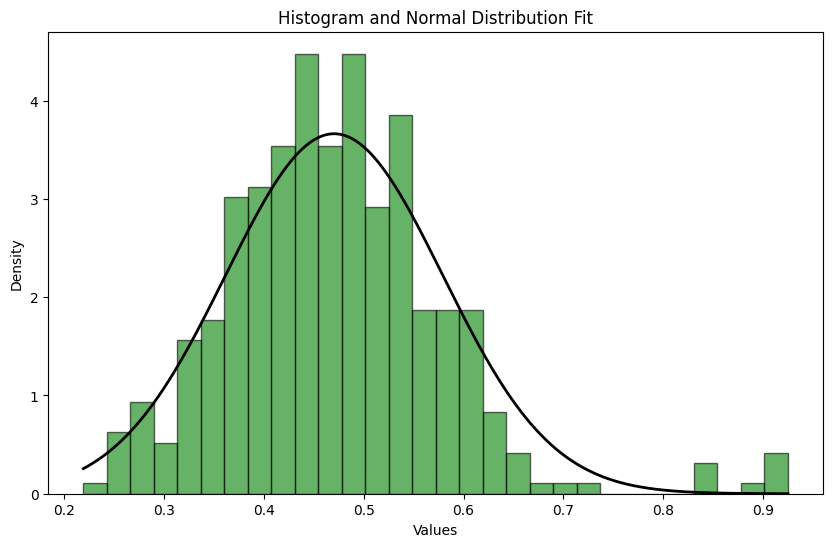

(0.4702867647058824, 0.10888367880955116)

In [4]:
import pandas as pd

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data_values = data['Democratic %'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

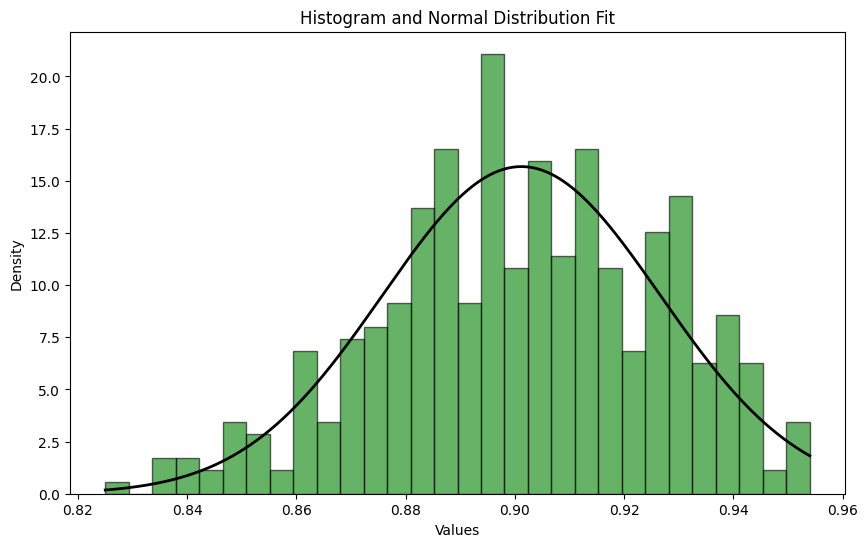

(0.9011813725490196, 0.02544277404406379)

In [5]:
import pandas as pd

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data_values = data['HDI'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev

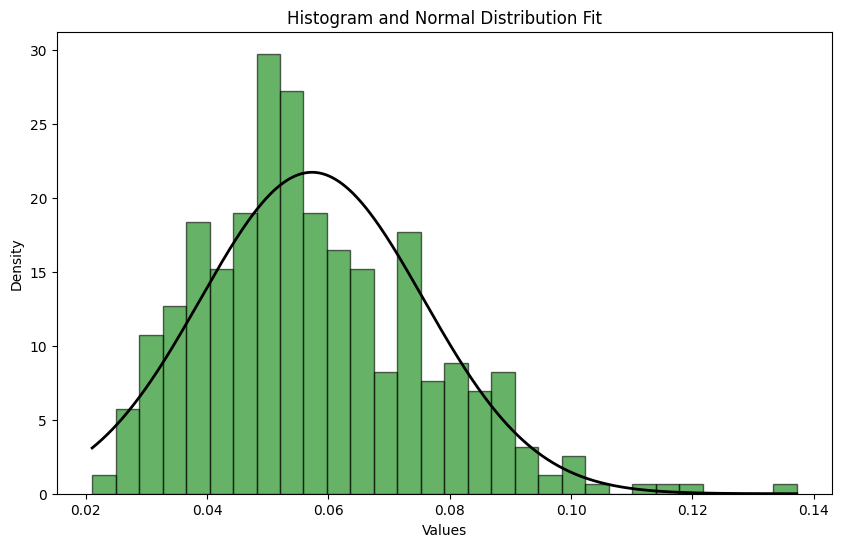

(0.057307230392156856, 0.018344195906518316)

In [6]:
import pandas as pd

file_path = 'data/main_data.xlsx'
data = pd.read_excel(file_path)
data_values = data['Unemployment %'].values
# Oblicz średnią i odchylenie standardowe
mean = np.mean(data_values)
std_dev = np.std(data_values)

# Utwórz dane dla wykresu PDF
x = np.linspace(min(data_values), max(data_values), 1000)
y = norm.pdf(x, mean, std_dev)

# Wyświetl histogram i wykres rozkładu normalnego
plt.figure(figsize=(10, 6))
plt.hist(data_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x, y, 'k', linewidth=2)
plt.title('Histogram and Normal Distribution Fit')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

mean, std_dev